In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'C:\\Users\\bharg\\Downloads\\face\\train'
TEST_DIR = 'C:\\Users\\bharg\\Downloads\\face\\test'

In [3]:
def createdataframe(dir):
    image_paths = []     # Step 1: Initialize empty lists to store image paths and labels
    labels = []
     # Step 2: Iterate over each label (subdirectory) in the specified directory
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)): # Step 3: Iterate over each image file in the current label's directory
            image_paths.append(os.path.join(dir,label,imagename))  # Step 4: Build the full path to the image and append it to image_paths
            labels.append(label)  # Step 5: Append the label (subdirectory name) to the labels list
        print(label, "completed")
    return image_paths,labels 

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                                   image     label
0      C:\Users\bharg\Downloads\face\train\angry\Trai...     angry
1      C:\Users\bharg\Downloads\face\train\angry\Trai...     angry
2      C:\Users\bharg\Downloads\face\train\angry\Trai...     angry
3      C:\Users\bharg\Downloads\face\train\angry\Trai...     angry
4      C:\Users\bharg\Downloads\face\train\angry\Trai...     angry
...                                                  ...       ...
28704  C:\Users\bharg\Downloads\face\train\surprise\T...  surprise
28705  C:\Users\bharg\Downloads\face\train\surprise\T...  surprise
28706  C:\Users\bharg\Downloads\face\train\surprise\T...  surprise
28707  C:\Users\bharg\Downloads\face\train\surprise\T...  surprise
28708  C:\Users\bharg\Downloads\face\train\surprise\T...  surprise

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\bharg\Downloads\face\test\angry\Priva...     angry
1     C:\Users\bharg\Downloads\face\test\angry\Priva...     angry
2     C:\Users\bharg\Downloads\face\test\angry\Priva...     angry
3     C:\Users\bharg\Downloads\face\test\angry\Priva...     angry
4     C:\Users\bharg\Downloads\face\test\angry\Priva...     angry
...                                                 ...       ...
7173  C:\Users\bharg\Downloads\face\test\surprise\Pu...  surprise
7174  C:\Users\bharg\Downloads\face\test\surprise\Pu...  surprise
7175  C:\Users\bharg\Downloads\face\test\surprise\Pu...  surprise
7176  C:\Users\bharg\Downloads\face\test\surprise\Pu...  surprise
7177  C:\Users\bharg\Downloads\face\test\surprise\Pu...  surprise

[7178 rows x 2 columns]
0       C:\Users\bharg\Downloads\face\test\angry\Priva...
1       C:\Users\bharg\Downloads\face\test\angry\Priva...
2       C:\Users\bharg\Downloads\face\test\angry\Priva...
3       C

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []  # Step 1: Initialize an empty list to store the extracted features
    for image in tqdm(images):  # Step 2: Iterate over each image path in the provided list
        img = load_img(image,grayscale =  True )  # Step 3: Load the image using keras.preprocessing.image.load_img
        img = np.array(img)    # Step 4: Convert the image to a numpy array
        features.append(img)   # Step 5: Append the image array to the features list
    features = np.array(features)  # Step 6: Convert the list of image arrays to a numpy array
    features = features.reshape(len(features),48,48,1)
    return features   # Step 8: Return the final array of extracted features

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0 

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

In [20]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100


225/225 [==============================] - 674s 3s/step - loss: 1.8242 - accuracy: 0.2464 - val_loss: 1.8198 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 674s 3s/step - loss: 1.8033 - accuracy: 0.2550 - val_loss: 1.7857 - val_accuracy: 0.2471
Epoch 3/100
225/225 [==============================] - 683s 3s/step - loss: 1.7348 - accuracy: 0.2833 - val_loss: 1.6333 - val_accuracy: 0.3369
Epoch 4/100
225/225 [==============================] - 711s 3s/step - loss: 1.6206 - accuracy: 0.3564 - val_loss: 1.5087 - val_accuracy: 0.3944
Epoch 5/100
225/225 [==============================] - 362s 2s/step - loss: 1.5020 - accuracy: 0.4152 - val_loss: 1.3773 - val_accuracy: 0.4625
Epoch 6/100
225/225 [==============================] - 377s 2s/step - loss: 1.4385 - accuracy: 0.4436 - val_loss: 1.3276 - val_accuracy: 0.4862
Epoch 7/100
225/225 [==============================] - 360s 2s/step - loss: 1.3927 - accuracy: 0.4667 - val_loss: 1.2833 - val_accurac

In [21]:
model.save("facedl.h5")

C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
model_json = model.to_json()
with open("facedl.json",'w') as json_file:
    json_file.write(model_json)
model.save("facedl.h5")

In [23]:
from keras.models import model_from_json

In [24]:
json_file = open("facedl.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facedl.h5")

In [25]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [26]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    #plt.figure(figsize= (5,5))
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of disgust


C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 399ms/step
model prediction is  disgust


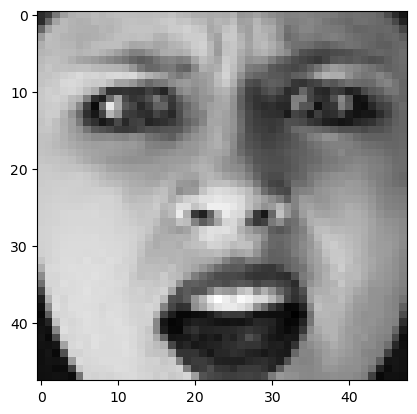

In [28]:
image = 'C:\\Users\\bharg\\Downloads\\face\\train\\disgust\\Training_2580532.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 35ms/step
model prediction is  happy


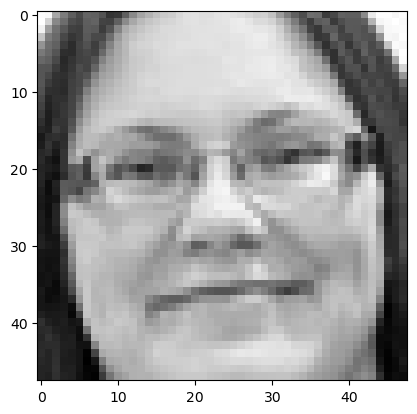

In [29]:
image = 'C:\\Users\\bharg\\Downloads\\face\\train\\happy\\Training_1206.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 44ms/step
model prediction is  surprise


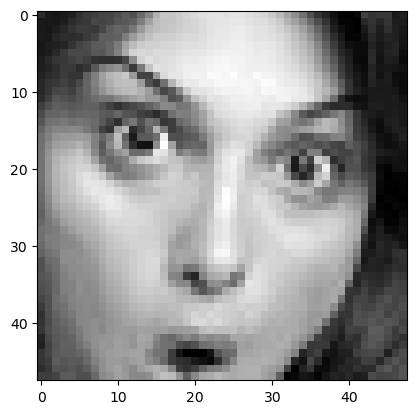

In [30]:
image = 'C:\\Users\\bharg\\Downloads\\face\\train\\surprise\\Training_8796.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 [==============================] - 0s 30ms/step
model prediction is  angry


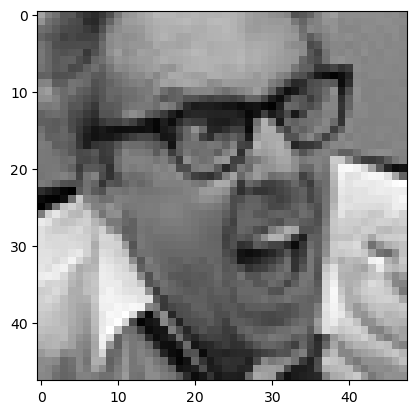

In [31]:
image = 'C:\\Users\\bharg\\Downloads\\face\\train\\angry\\Training_3908.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 [==============================] - 0s 32ms/step
model prediction is  neutral


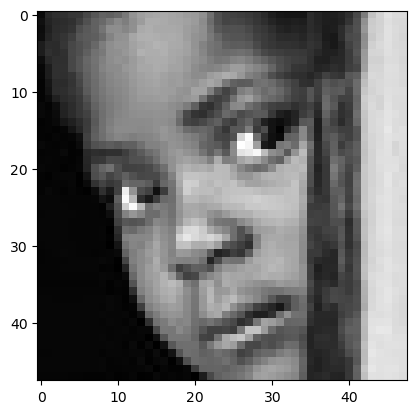

In [32]:
image = 'C:\\Users\\bharg\\Downloads\\face\\train\\neutral\\Training_65667.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

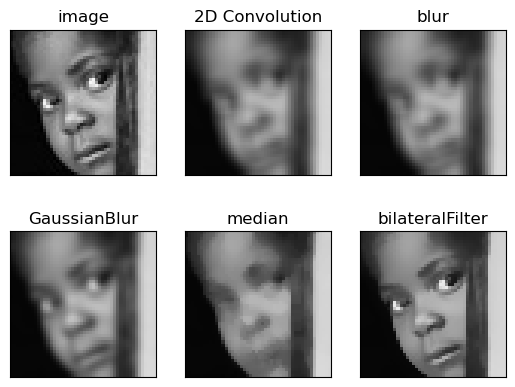

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:\\Users\\bharg\\Downloads\\face\\train\\neutral\\Training_65667.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img, (5, 5))
gblur = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)
bilateralFilter = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
images = [img, dst, blur, gblur, median, bilateralFilter]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

225/225 [==============================] - 23s 101ms/step
Confusion Matrix
[[ 478    7   65   67  118  195   28]
 [  22   57    6    6    6   12    2]
 [ 103    3  334   50  153  265  116]
 [  42    1   20 1501   97   81   32]
 [  66    2   40   86  769  254   16]
 [ 103    2   87   76  239  716   24]
 [  21    1   29   54   40   29  657]]


225/225 [==============================] - 22s 98ms/step
Confusion matrix, without normalization
[[ 478    7   65   67  118  195   28]
 [  22   57    6    6    6   12    2]
 [ 103    3  334   50  153  265  116]
 [  42    1   20 1501   97   81   32]
 [  66    2   40   86  769  254   16]
 [ 103    2   87   76  239  716   24]
 [  21    1   29   54   40   29  657]]


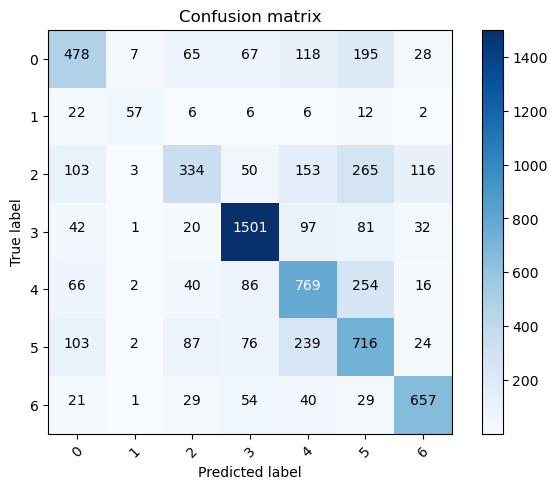

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
# Assuming you have the ground truth labels (y_test) and predicted labels (y_pred)
y_test_arg = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test_arg, y_pred)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plot_confusion_matrix(confusion_mtx, classes=np.unique(y_test_arg), normalize=False)
plt.show()


In [37]:
#import matplotlib.pyplot as plt
#plt.style.use('dark_background')

#plt.figure(figsize=(20,10))
#plt.subplot(1, 2, 1)
#plt.suptitle('Optimizer : Adam', fontsize=10)
#plt.ylabel('Loss', fontsize=16)
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
##plt.legend(loc='upper right')
#plt.subplot(1, 2, 2)
#plt.ylabel('Accuracy', fontsize=14)
#plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.legend(loc='lower right')
#plt.show()